# 1. Load the Data


In [43]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv("data/train.csv")
data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


# 2. Exploratory Data Analysis


In [45]:
data.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [46]:
data.shape

(30000, 24)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In which `Age` the people apply the more loan
- This will count the number of people apply for the particular age.

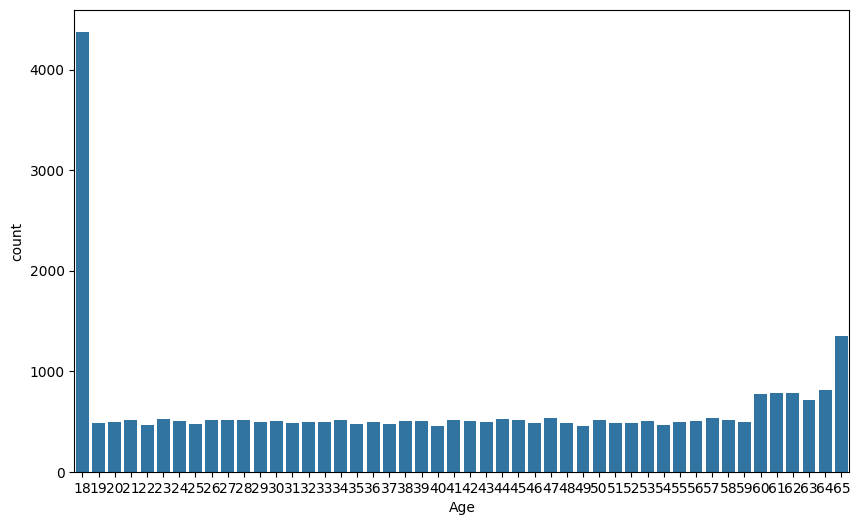

People Start apply in AGE:  18
People applay at last AGE:  65
Age with the highest number of people applying for a loan: 18
Count of people at that age: 4378

People applyed for loan is:  30000
People applyed and got loan is:  29660
People Those who not get the loan amount:  340


In [48]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=data, x=data['Age'])
plt.show()

max_count_age = data['Age'].value_counts().idxmax()
max_count = data['Age'].value_counts().max()
print("People Start apply in AGE: ", data['Age'].min())
print("People applay at last AGE: ", data['Age'].max())
print("Age with the highest number of people applying for a loan:", max_count_age)
print("Count of people at that age:", max_count)

loan_requested = data['Loan Amount Request (USD)'].count()
loan_amount_got = data['Loan Sanction Amount (USD)'].count()
print("\nPeople applyed for loan is: ", loan_requested)
print("People applyed and got loan is: ", loan_amount_got)
print("People Those who not get the loan amount: ", loan_requested - loan_amount_got)

People `request for loan amount` is

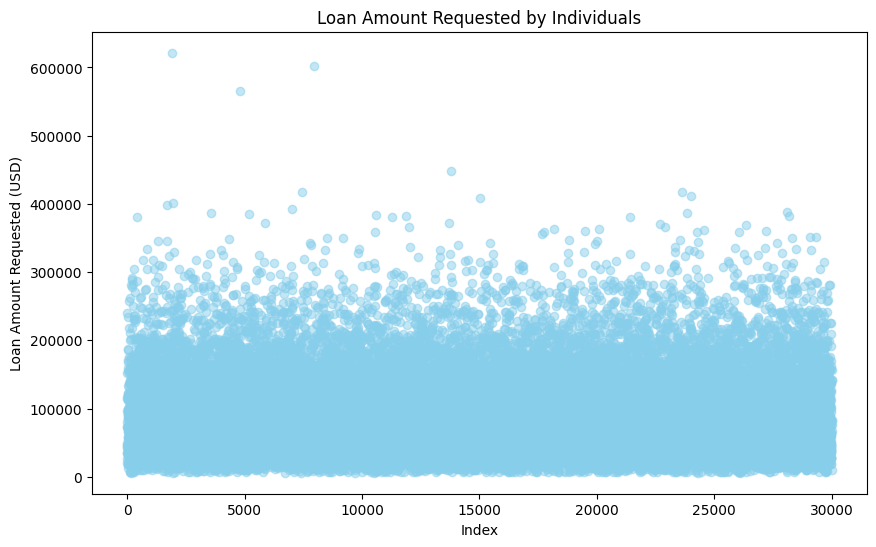

In [49]:

# Plotting each individual's loan amount request
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
plt.scatter(range(len(data)), data['Loan Amount Request (USD)'], color='skyblue', alpha=0.5)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Loan Amount Requested (USD)')
plt.title('Loan Amount Requested by Individuals')

# Show the plot
plt.show()


People `got loan amount` is 

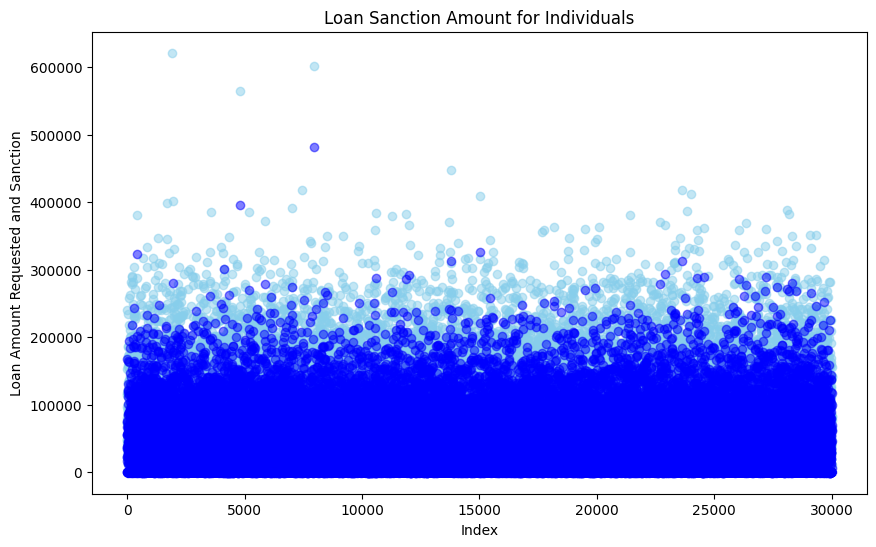

In [50]:

plt.figure(figsize=(10, 6)) 

plt.scatter(range(len(data)), data['Loan Amount Request (USD)'], color='skyblue', alpha=0.5)
plt.scatter(range(len(data)), data['Loan Sanction Amount (USD)'], color='blue', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Loan Amount Requested and Sanction')
plt.title('Loan Sanction Amount for Individuals')

plt.show()


People `Income Stability` VS `Loan amount requested`

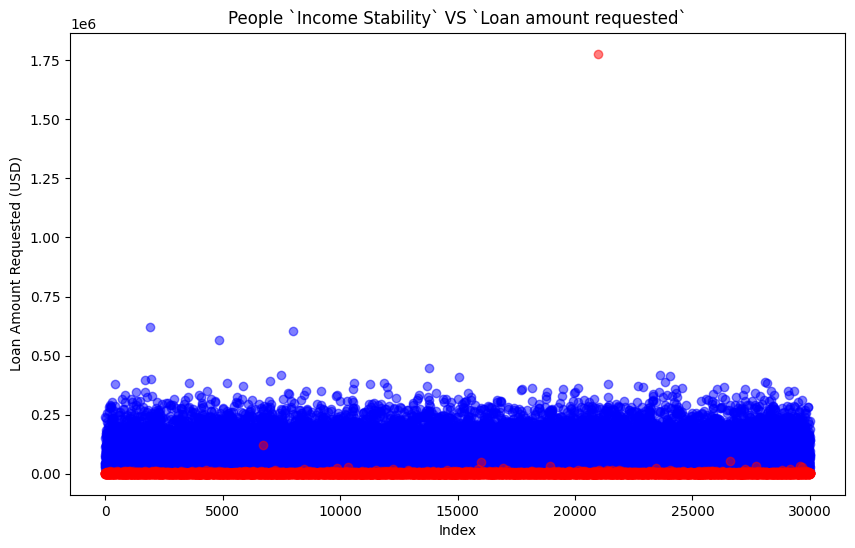

In [51]:
plt.figure(figsize=(10, 6))  
plt.scatter(range(len(data)), data['Loan Amount Request (USD)'], color='blue', alpha=0.5)
plt.scatter(range(len(data)), data['Income (USD)'], color='red', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Loan Amount Requested (USD)')
plt.title('People `Income Stability` VS `Loan amount requested`')

plt.show()


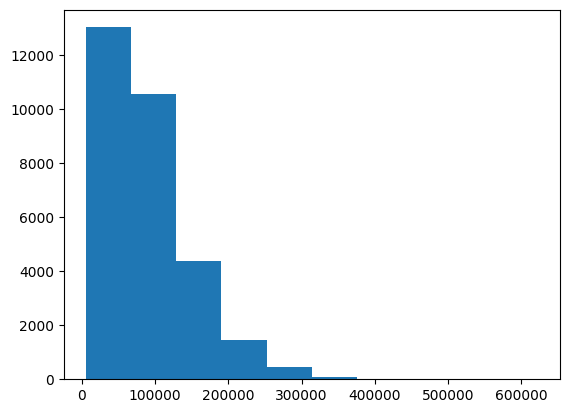

In [52]:
plt.hist(x=data['Loan Amount Request (USD)'])
plt.show()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [54]:
data.dropna(inplace=True)

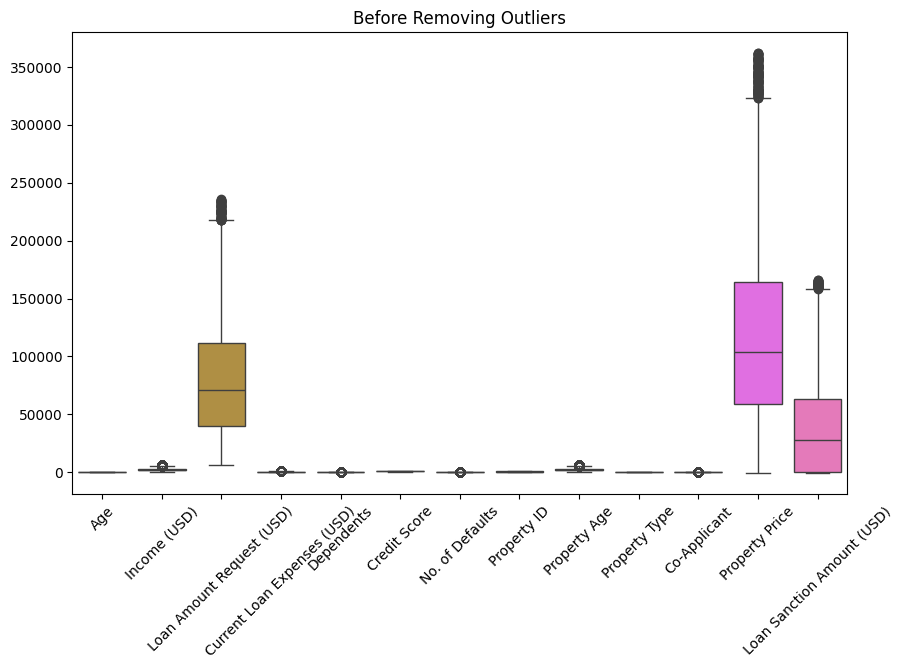

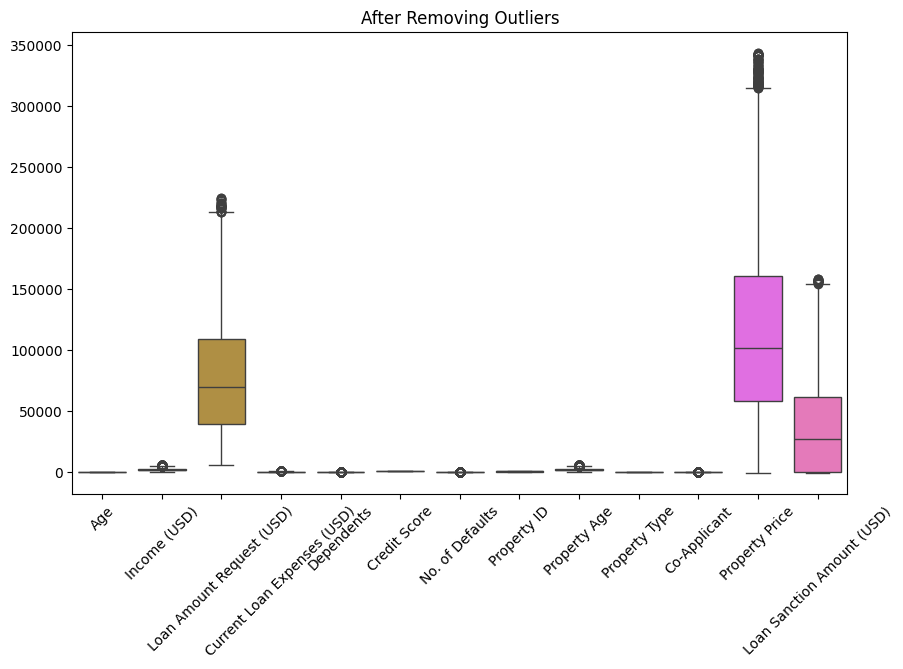

In [64]:
# Before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_cols])
plt.title("Before Removing Outliers")
plt.xticks(rotation=45)
plt.show()

# Remove outliers using z-score method
from scipy import stats
z_scores = stats.zscore(data[numerical_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# After removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_cols])
plt.title("After Removing Outliers")
plt.xticks(rotation=45)
plt.show()


In [56]:

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

encoded_data = pd.get_dummies(data, columns=categorical_cols)

encoded_data

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,...,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
5,60,1234.92,34434.72,181.48,2.0,684.12,1,491,1234.92,2,...,True,False,True,False,False,True,False,True,False,False
6,43,2361.56,152561.34,697.67,2.0,637.29,0,227,2361.56,1,...,False,True,False,True,False,False,True,False,True,False
8,38,1296.07,35141.99,155.95,3.0,705.29,1,241,1296.07,4,...,True,False,False,True,True,False,False,True,False,False
9,18,1546.17,42091.29,500.20,2.0,613.24,0,883,1546.17,2,...,True,False,True,False,False,False,True,False,False,True
10,18,2416.86,25765.72,140.02,1.0,652.41,0,325,2416.86,2,...,True,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,64,4211.81,225434.35,867.88,3.0,842.81,0,408,4211.81,1,...,True,False,True,False,False,False,True,False,False,True
29992,34,2904.15,141260.03,477.19,4.0,647.87,0,922,2904.15,2,...,True,False,True,False,False,True,False,False,True,False
29995,38,4969.41,76657.90,722.34,2.0,869.61,0,566,4969.41,4,...,False,True,False,True,False,False,True,False,False,True
29996,20,1606.88,66595.14,253.04,3.0,729.41,0,175,1606.88,3,...,True,False,True,False,False,True,False,False,False,True


In [57]:
from sklearn.preprocessing import LabelEncoder

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])



In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

X = data.drop(columns=['Loan Sanction Amount (USD)'])  # Features
y = data['Loan Sanction Amount (USD)']  # Target variable

rf = RandomForestRegressor()

rf.fit(X, y)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

threshold = 0.01  # Adjust threshold as per requirement
selected_features = feature_importances[feature_importances['importance'] > threshold].index.tolist()

selected_data = data[selected_features]


In [59]:
selected_data

,Loan Amount Request (USD),Customer ID,Credit Score
5,34434.72,1784,684.12
6,152561.34,3174,637.29
8,35141.99,3853,705.29
9,42091.29,3419,613.24
10,25765.72,9420,652.41
...,...,...,...
29990,225434.35,13047,842.81
29992,141260.03,5905,647.87
29995,76657.90,10739,869.61
29996,66595.14,5709,729.41


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = selected_data
y = data['Loan Sanction Amount (USD)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 801872667.4605412


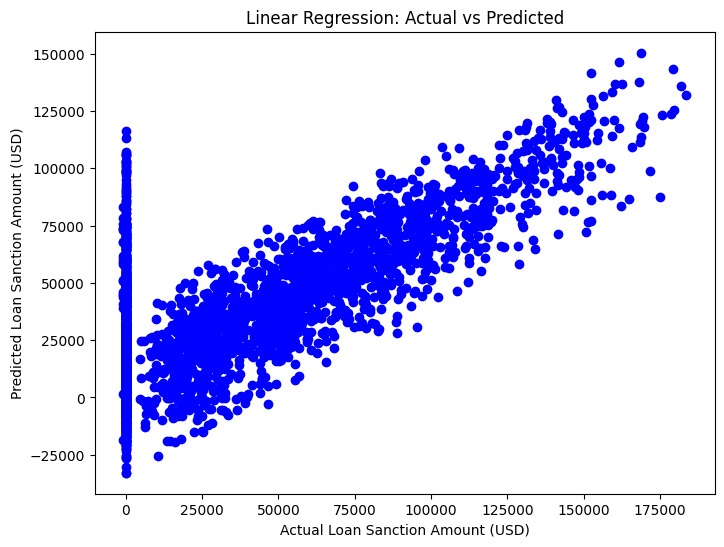

In [61]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Loan Sanction Amount (USD)')
plt.ylabel('Predicted Loan Sanction Amount (USD)')
plt.show()


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_evaluate_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    
    y_pred = linear_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Performance Metrics:")
    print("--------------------")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared Score:", r2)

X = selected_data
y = data['Loan Sanction Amount (USD)']  # Target variable

train_evaluate_linear_regression(X, y)


Performance Metrics:
--------------------
Mean Squared Error: 801872667.4605412
Mean Absolute Error: 21117.543808052018
R-squared Score: 0.5615890426807053
